In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
data = pd.read_csv('spotifyTarget.csv')

In [3]:
data.head(3)

,name,artists,percentage,danceability,energy,liveness,loudness,speechiness,tempo,mode2,acousticness,instrumentalness
0,Clancy Lowered the Boom,['Dennis Day'],0.660748,0.819,0.341,0.160,0.47559,0.4150,0.253900,0.25,0.732,0.000
1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.506691,0.328,0.166,0.101,0.45150,0.0339,0.459746,0.25,0.961,0.913
2,Gati Mardika,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.619534,0.697,0.346,0.130,0.47494,0.0700,0.499267,0.25,0.579,0.168


In [4]:
X = data[['percentage','acousticness','instrumentalness']]

In [11]:
kmeans = KMeans(n_clusters=7)
model = kmeans.fit(X)

In [15]:
from mpl_toolkits import mplot3d

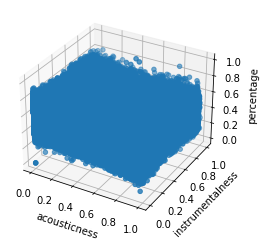

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')

a = data['percentage']
b = data['acousticness']
c = data['instrumentalness']

ax.scatter(b, c, a)

ax.set_xlabel('acousticness')
ax.set_ylabel('instrumentalness')
ax.set_zlabel('percentage')
plt.show()

In [6]:
kmeans.labels_

array([0, 2, 0, ..., 4, 1, 1], dtype=int32)

In [7]:
kmeans.cluster_centers_

array([[0.59555498, 0.66133845, 0.01526338],
       [0.69135631, 0.06707437, 0.01774288],
       [0.45451985, 0.88770294, 0.82107548],
       [0.57722108, 0.12217709, 0.71456411],
       [0.44123686, 0.07943443, 0.01971854],
       [0.59914881, 0.36904206, 0.01318979],
       [0.48398854, 0.88263418, 0.03104798]])

<AxesSubplot:xlabel='acousticness', ylabel='instrumentalness'>

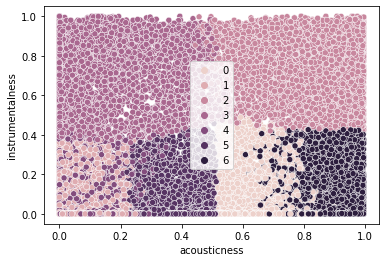

In [8]:
sns.scatterplot(data=X, x='acousticness', y='instrumentalness', hue=kmeans.labels_)

<AxesSubplot:xlabel='percentage', ylabel='acousticness'>

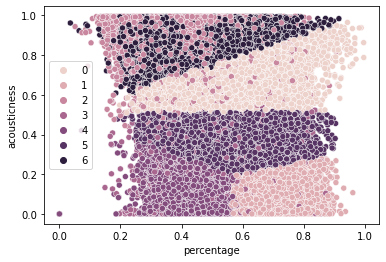

In [9]:
sns.scatterplot(data=X, x='percentage', y='acousticness', hue=kmeans.labels_)

<AxesSubplot:xlabel='percentage', ylabel='instrumentalness'>

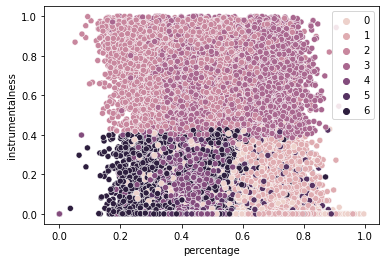

In [10]:
sns.scatterplot(data=X, x='percentage', y='instrumentalness', hue=kmeans.labels_)

In [6]:
smallData = data.copy()

In [7]:
smallData = smallData.iloc[:,:3]

In [8]:
smallData['error'] = 0

In [9]:
smallData.head(3)

,name,artists,percentage,error
0,Clancy Lowered the Boom,['Dennis Day'],0.660748,0
1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.506691,0
2,Gati Mardika,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.619534,0


In [10]:
smallData.loc[0:2,'error'] #loc 진짜 index / iloc 숫자 idx  iloc은 슬라이싱에서 and 포함x
#pandas sort api
#for loop x ->map 함수 이용
#numpy로 export해서..

0    0
1    0
2    0
Name: error, dtype: int64

In [17]:
import time
def withPositivity(positivity, data):
    start = time.time()
    for i in range(0,len(data)):
        musicPositivity = data.loc[i,'percentage']
        #print(musicPositivity)
        error = abs(positivity - musicPositivity)
        #print(error)
        data.loc[i,'error'] = error
        #index 의 i -> loc사용
    sortedData = data.sort_values(by='error', ascending=True)
    finish = time.time()
    print('time' , finish-start)
    print(sortedData.head(3))

In [18]:
withPositivity(0.8, smallData)

time 28.11272883415222
                                           name  \
1624   Final Speech (From "The Great Dictator")   
1627   Final Speech - From "The Great Dictator"   
67583                (Can't You) Trip Like I Do   

                                artists  percentage     error  
1624                ['Charlie Chaplin']    0.800010  0.000010  
1627                ['Charlie Chaplin']    0.800010  0.000010  
67583  ['Filter', 'The Crystal Method']    0.800025  0.000025  


In [19]:
smallData.iloc[1624,:]

name          Final Speech (From "The Great Dictator")
artists                            ['Charlie Chaplin']
percentage                                     0.80001
error                                          0.00001
Name: 1624, dtype: object

In [22]:
smallData.iloc[1627,:]

name          Final Speech - From "The Great Dictator"
artists                            ['Charlie Chaplin']
percentage                                     0.80001
error                                          0.00001
Name: 1627, dtype: object

In [ ]:
'''
 1. nlp 결과가 벡터로 나올 수 있는지? (0, 1, 2)
 2. x축 acoustic, y축 instrumentalness, z축 percentage 3차원에 뿌리고 nlp결과를 떨군다
 축이 같지 않아서 불가능.. 
 
 3. 머신러닝 알고리즘이 있는지? 코사인 유사도 annoy
 knn을 음악데이터로 먼저 돌리고, 
 
 4. 데이터 라벨링
 
 문장을 input으로 넣고 label이
'''